In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Importing the Dataset
data = pd.read_csv('C:/Users/dhaka/Downloads/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print("Column headers/names: {}".format(list(data.columns)))

Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [5]:
print("Shape of Red Wine dataset: {}".format(data.shape))

Shape of Red Wine dataset: (1599, 12)


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# or we can use isnull().sum()
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

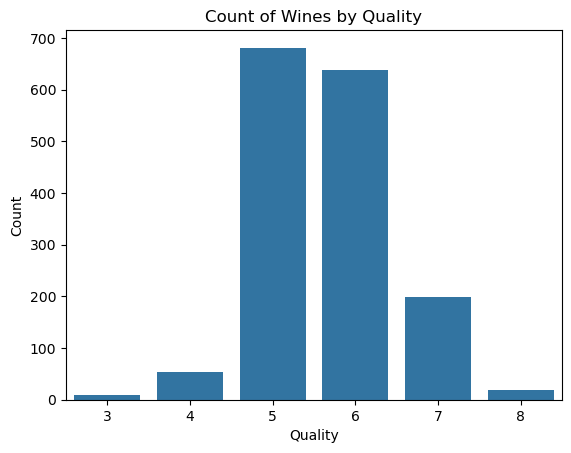

In [10]:
sns.countplot(data=data, x='quality')

# Add title and labels
plt.title('Count of Wines by Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

# Show the plot
plt.show()

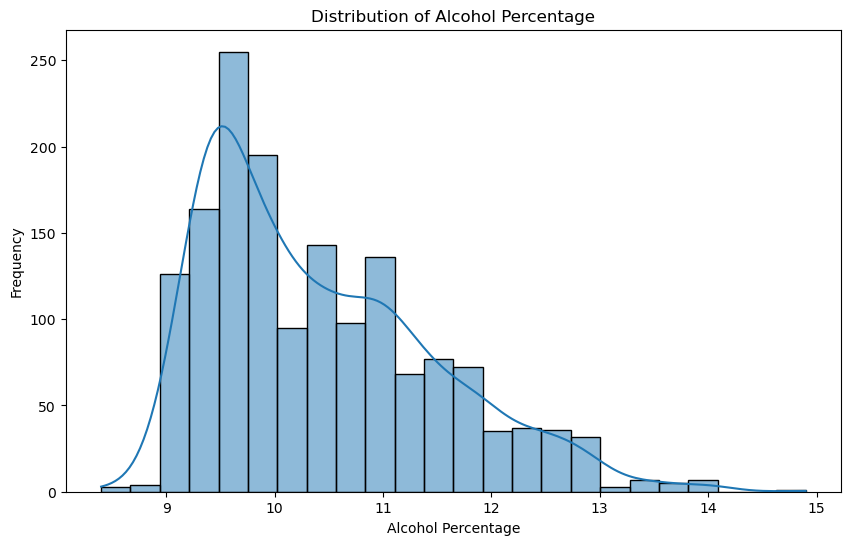

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['alcohol'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Alcohol Percentage')
plt.xlabel('Alcohol Percentage')
plt.ylabel('Frequency')
plt.show()

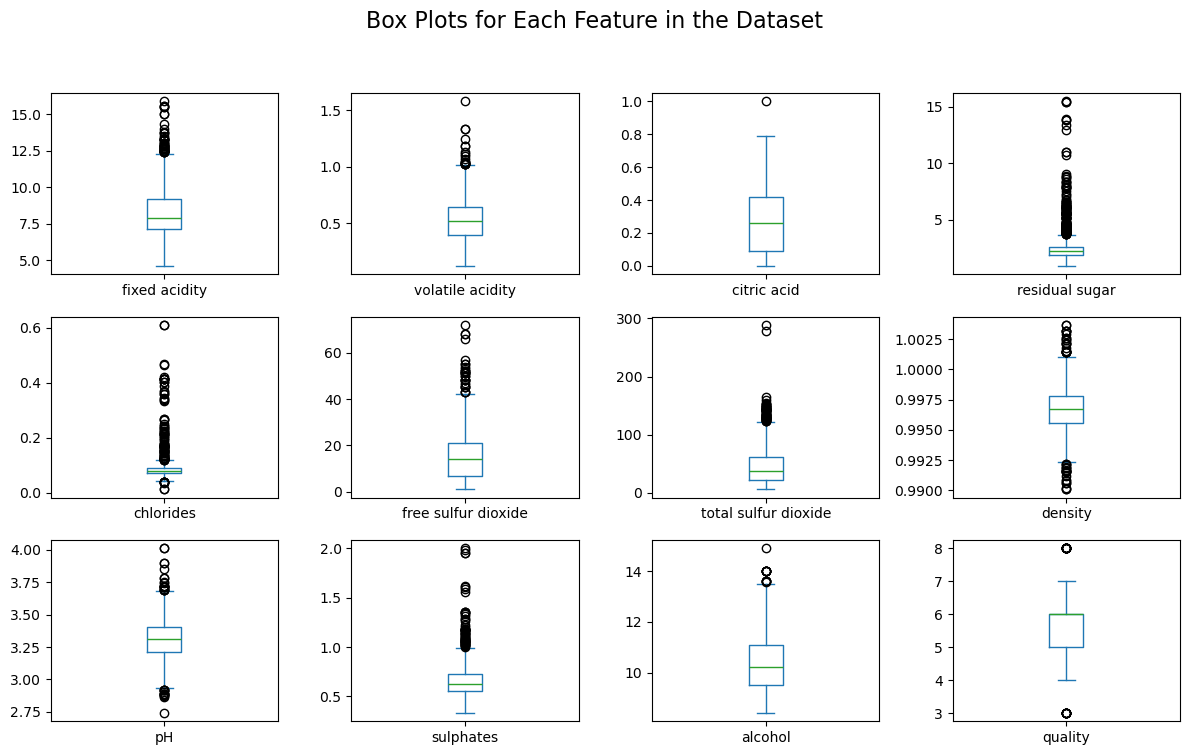

In [12]:
# Create box plots for all features in the DataFrame
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))

# Set the title for the entire figure
plt.suptitle('Box Plots for Each Feature in the Dataset', fontsize=16)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

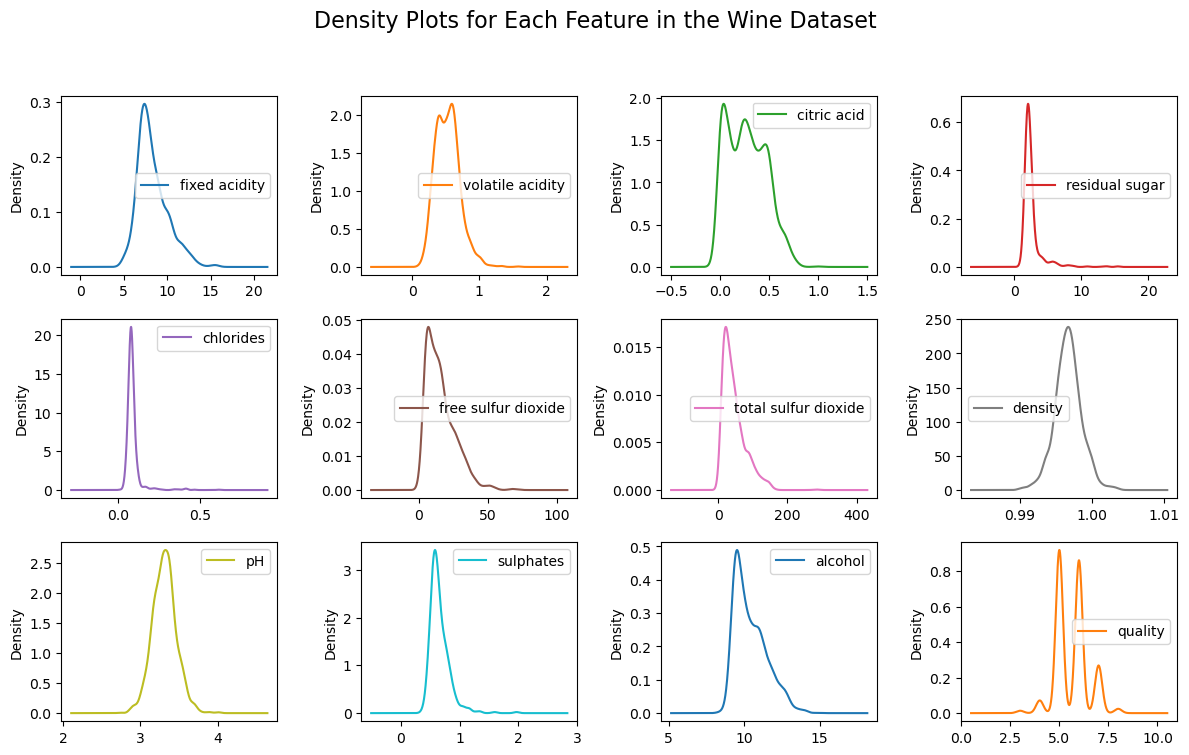

In [13]:
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))

# Set the title for the entire figure
plt.suptitle('Density Plots for Each Feature in the Wine Dataset', fontsize=16)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

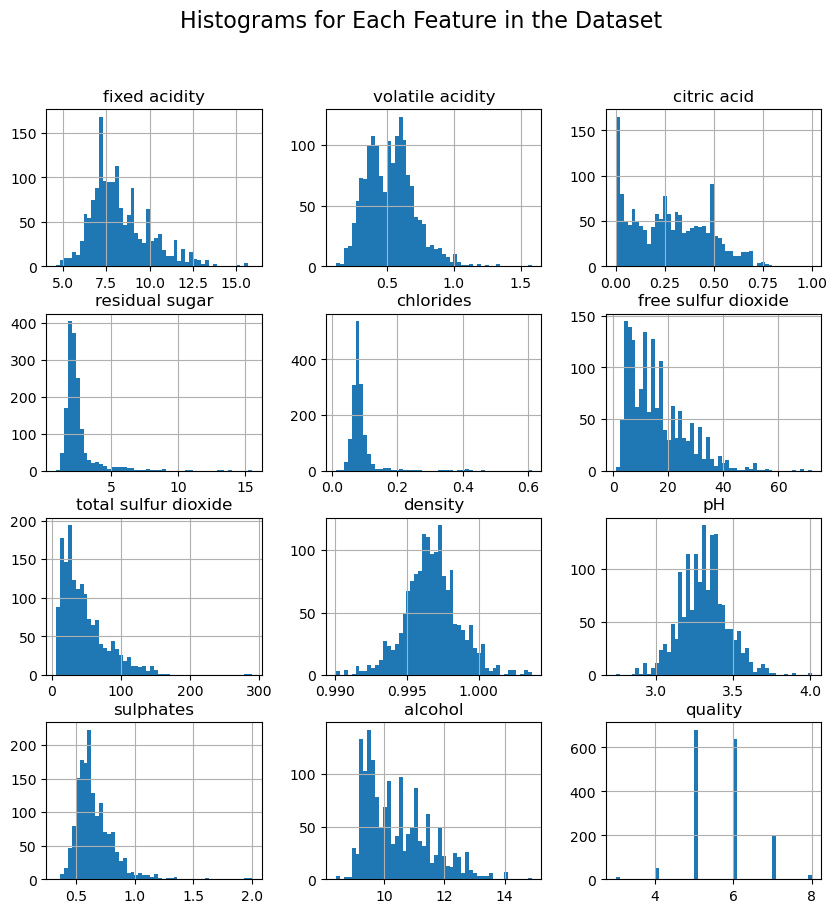

In [14]:
# Create histograms for all features in the DataFrame
data.hist(figsize=(10, 10), bins=50)

# Set the title for the entire figure
plt.suptitle('Histograms for Each Feature in the Dataset', fontsize=16)

# Show the plot
plt.show()

In [15]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# Data Visualization

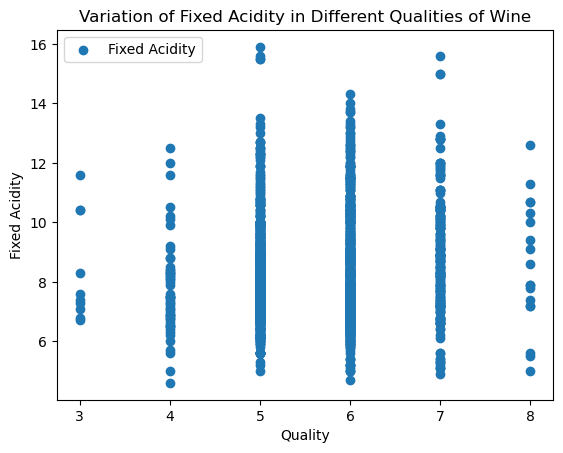

In [17]:
# Examining the variation of fixed acidity in different qualities of wine
plt.scatter(data['quality'], data['fixed acidity'], label='Fixed Acidity')
plt.title('Variation of Fixed Acidity in Different Qualities of Wine')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.show()

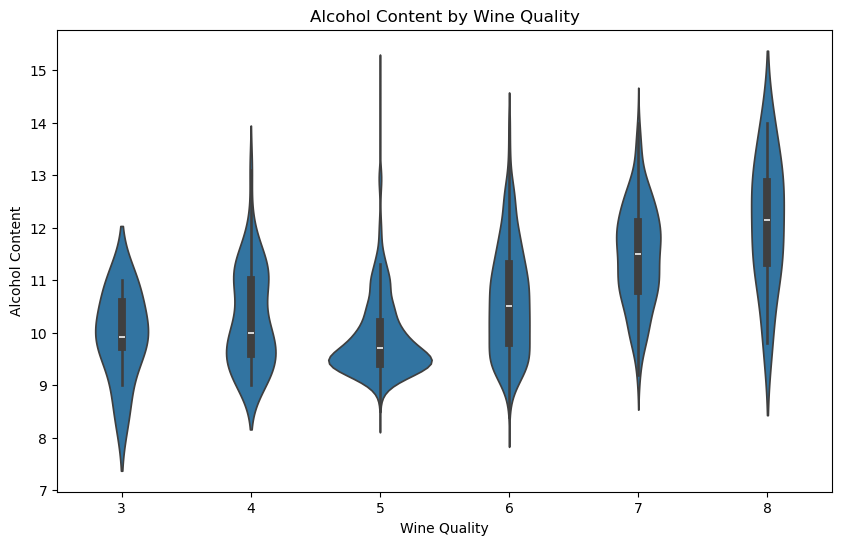

In [18]:
# Create a violin plot for alcohol content by wine quality
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', data=data)

# Set labels and title
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.title('Alcohol Content by Wine Quality')

# Show the plot
plt.show()

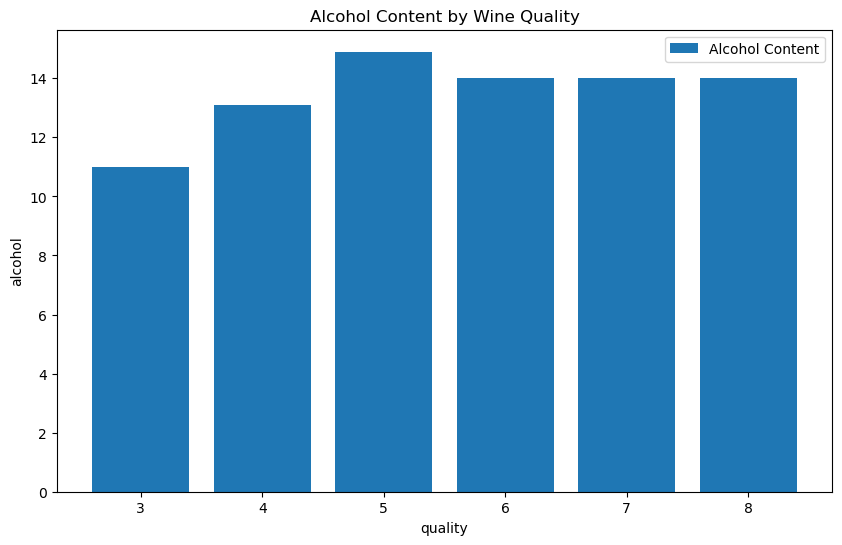

In [19]:
# Create a figure with specified size
fig = plt.figure(figsize=(10, 6))

# Creating a bar chart to show the relationship between alcohol content and wine quality
plt.bar(data['quality'], data['alcohol'], label='Alcohol Content')
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

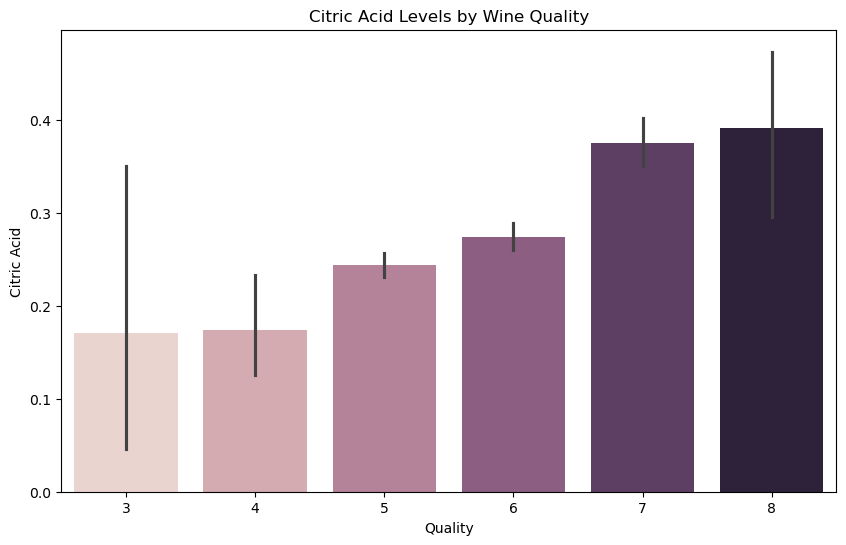

In [20]:
# Create a figure with specified size
fig = plt.figure(figsize=(10, 6))

# Create a bar plot with hue and without a legend
sns.barplot(x='quality', y='citric acid', data=data, hue='quality', legend=False)

# Add title and labels
plt.title('Citric Acid Levels by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')

# Show the plot
plt.show()

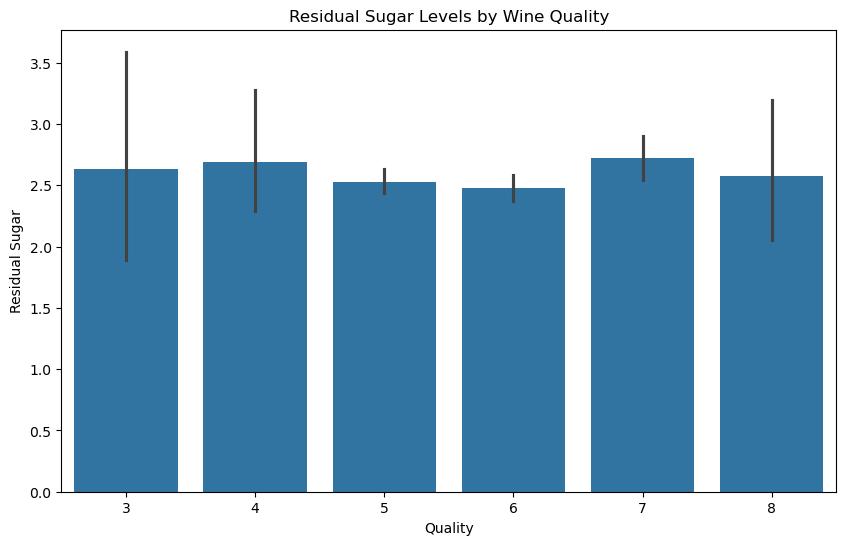

In [21]:
# Create a figure with specified size
fig = plt.figure(figsize=(10, 6))

# Create a bar plot for residual sugar by wine quality
sns.barplot(x='quality', y='residual sugar', data=data)

# Add title and labels
plt.title('Residual Sugar Levels by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')

# Show the plot
plt.show()

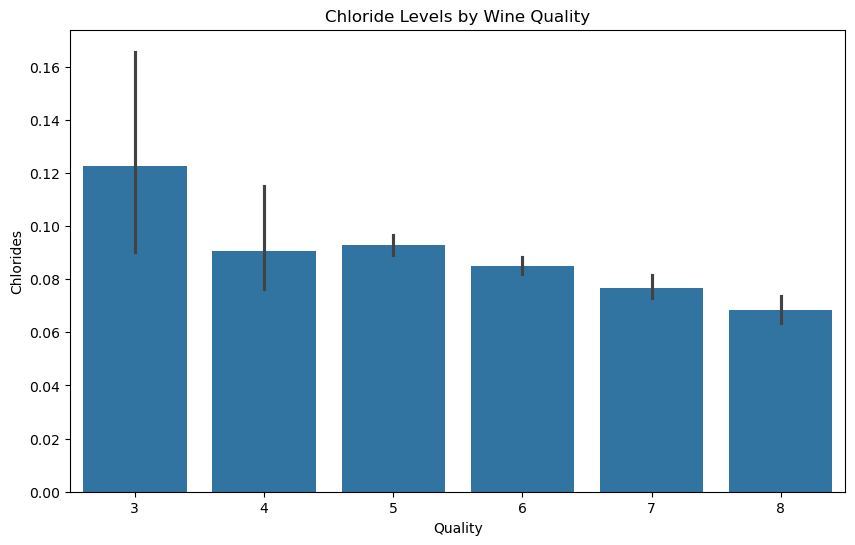

In [22]:
# Create a figure with specified size
fig = plt.figure(figsize=(10, 6))

# Create a bar plot for chlorides by wine quality
sns.barplot(x='quality', y='chlorides', data=data)

# Add title and labels
plt.title('Chloride Levels by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Chlorides')

# Show the plot
plt.show()

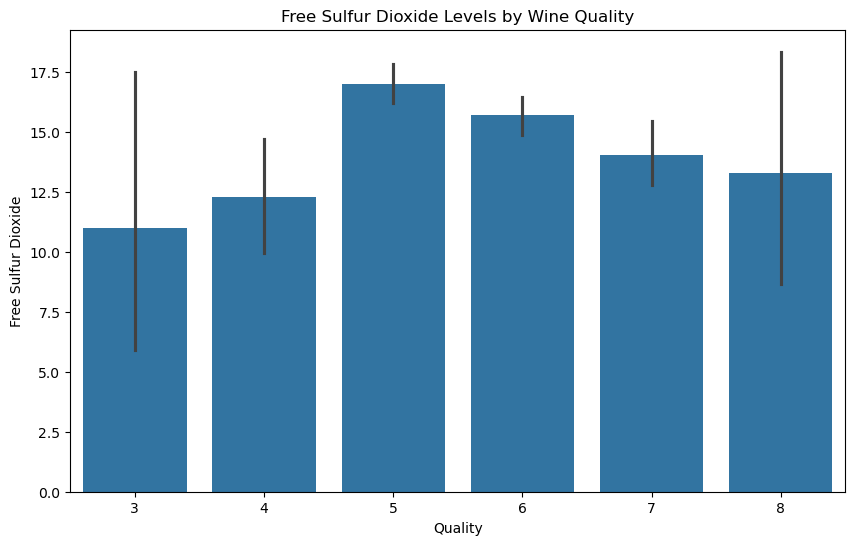

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with specified size
fig = plt.figure(figsize=(10, 6))

# Create a bar plot for free sulfur dioxide by wine quality
sns.barplot(x='quality', y='free sulfur dioxide', data=data)

# Add title and labels
plt.title('Free Sulfur Dioxide Levels by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')

# Show the plot
plt.show()


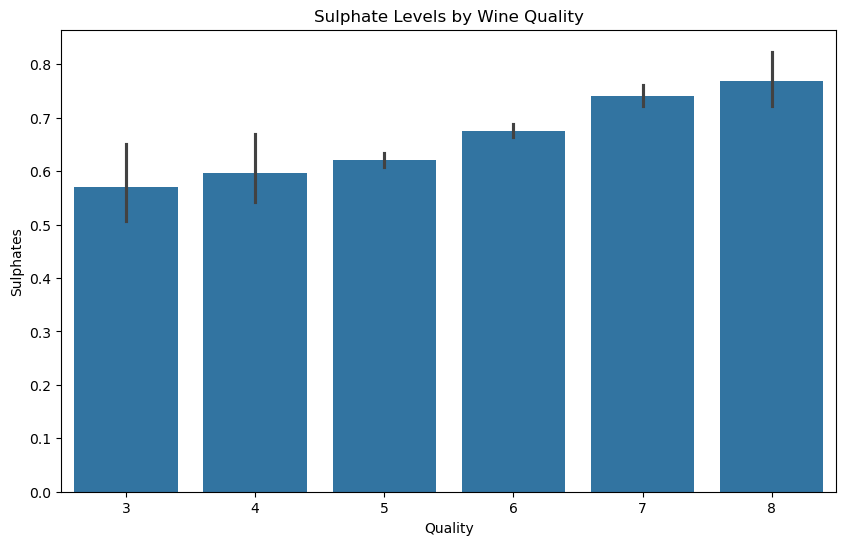

In [24]:
# Create a figure with specified size
fig = plt.figure(figsize=(10, 6))

# Create a bar plot for sulphates by wine quality
sns.barplot(x='quality', y='sulphates', data=data)

# Add title and labels
plt.title('Sulphate Levels by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Sulphates')

# Show the plot
plt.show()

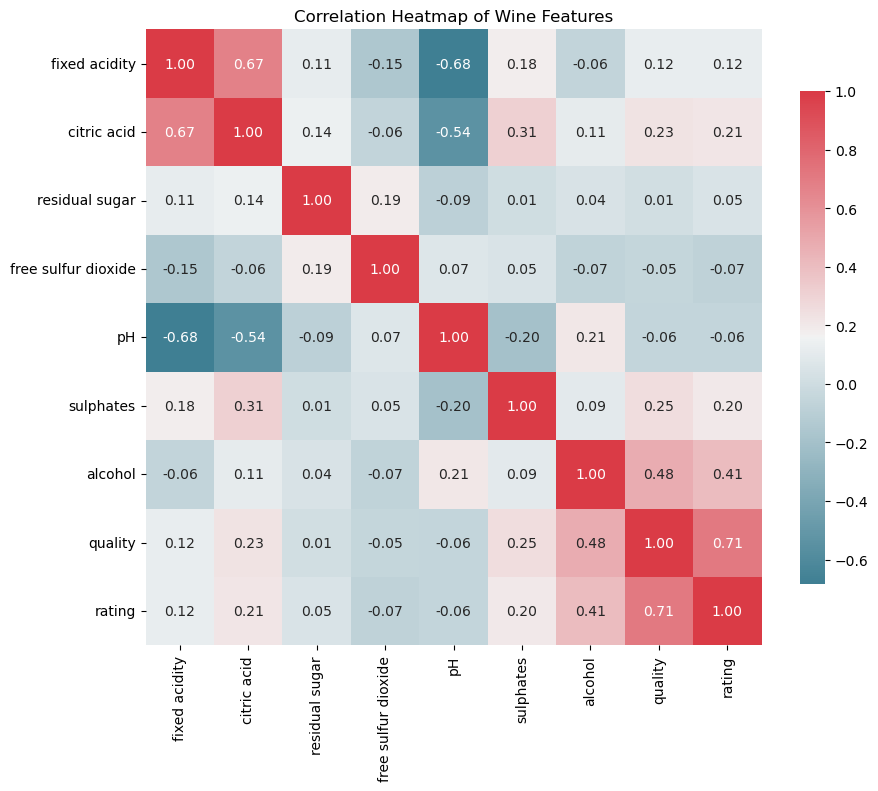

In [112]:
# Create a figure and axis
f, ax = plt.subplots(figsize=(10, 8))

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, 
            annot=True,  # Show correlation coefficients
            fmt=".2f",  # Format for the annotations
            cbar_kws={"shrink": .8},  # Shrink the color bar
            ax=ax)

# Add title
plt.title('Correlation Heatmap of Wine Features')

# Show the plot
plt.savefig("Fig1.jpg")
plt.show()

In [26]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [27]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

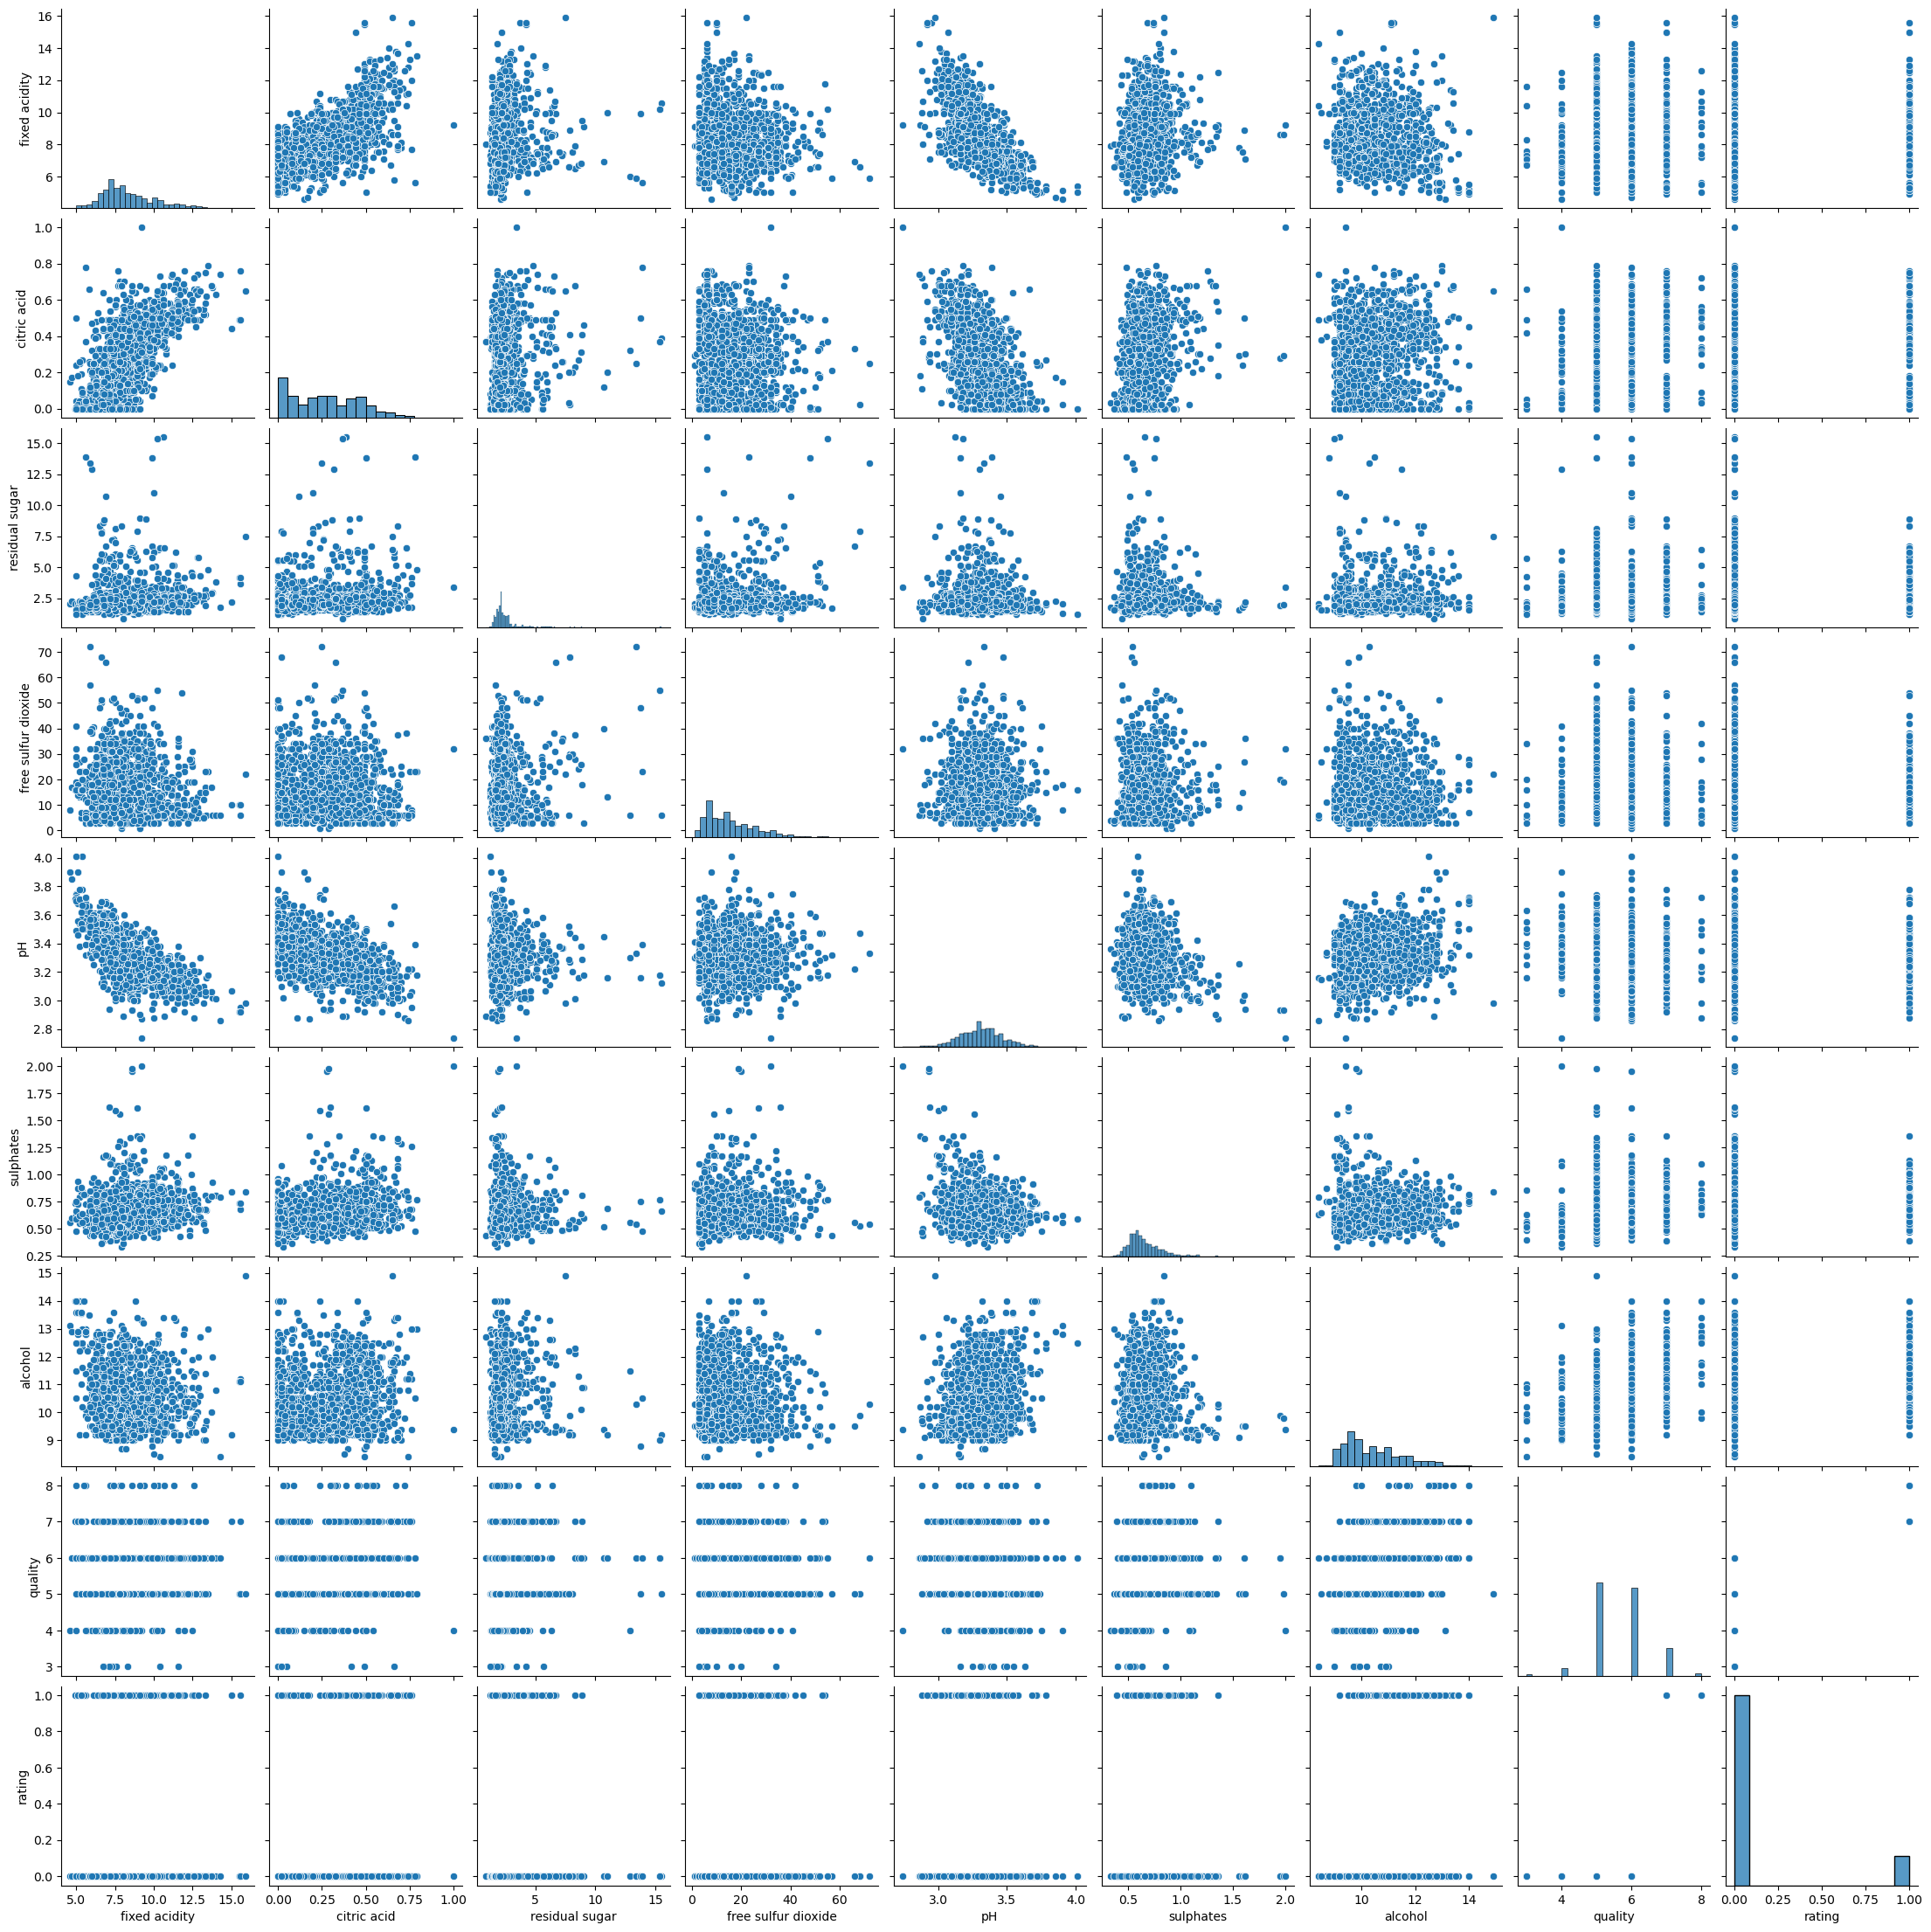

In [108]:
sns.pairplot(data)
plt.savefig("Fig.jpg")

In [29]:
#The dependent variable is not significantly correlated with volatile acidity, total sulphur dioxide, chlorides, or density.
data = data.drop(['volatile acidity', 'total sulfur dioxide','density', 'chlorides'], axis = 1)

#Checking the shape of the dataset
#print(data.shape)

In [30]:
conditions = [
    (data['quality'] >= 7),
    (data['quality'] < 7)
]
rating = ['Good', 'Bad']
data['rating'] = np.select(conditions, rating)
data.rating.value_counts()

rating
Bad     1382
Good     217
Name: count, dtype: int64

In [31]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Transform the 'quality' column
data['rating'] = le.fit_transform(data['rating'])

# Display the counts of the transformed 'quality' values
quality_counts = data['rating'].value_counts()
print(quality_counts)

rating
0    1382
1     217
Name: count, dtype: int64


In [32]:
data['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: rating, Length: 1599, dtype: int32>

In [33]:
data.groupby('rating').mean()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol,quality
rating,,,,,,,,
0,8.236831,0.254407,2.512120,16.172214,3.314616,0.644754,10.251037,5.408828
1,8.847005,0.376498,2.708756,13.981567,3.288802,0.743456,11.518049,7.082949


In [34]:
X = data.drop(['rating', 'quality'], axis=1)
Y = data['rating']

In [35]:
data

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol,quality,rating
0,7.4,0.00,1.9,11.0,3.51,0.56,9.4,5,0
1,7.8,0.00,2.6,25.0,3.20,0.68,9.8,5,0
2,7.8,0.04,2.3,15.0,3.26,0.65,9.8,5,0
3,11.2,0.56,1.9,17.0,3.16,0.58,9.8,6,0
4,7.4,0.00,1.9,11.0,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,32.0,3.45,0.58,10.5,5,0
1595,5.9,0.10,2.2,39.0,3.52,0.76,11.2,6,0
1596,6.3,0.13,2.3,29.0,3.42,0.75,11.0,6,0
1597,5.9,0.12,2.0,32.0,3.57,0.71,10.2,5,0


In [36]:
X

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.00,1.9,11.0,3.51,0.56,9.4
1,7.8,0.00,2.6,25.0,3.20,0.68,9.8
2,7.8,0.04,2.3,15.0,3.26,0.65,9.8
3,11.2,0.56,1.9,17.0,3.16,0.58,9.8
4,7.4,0.00,1.9,11.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,32.0,3.45,0.58,10.5
1595,5.9,0.10,2.2,39.0,3.52,0.76,11.2
1596,6.3,0.13,2.3,29.0,3.42,0.75,11.0
1597,5.9,0.12,2.0,32.0,3.57,0.71,10.2


In [37]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: rating, Length: 1599, dtype: int32

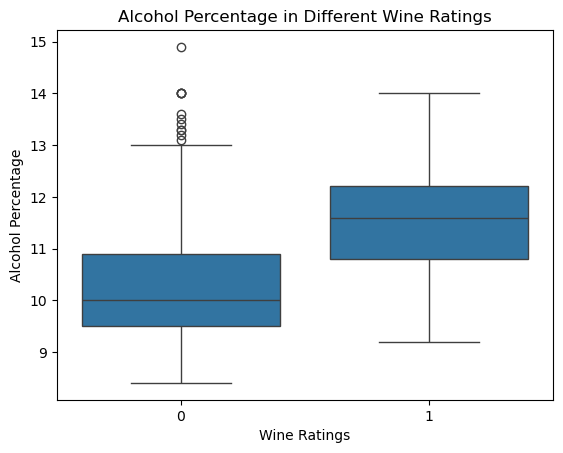

In [38]:
bx = sns.boxplot(x="rating", y='alcohol', data=data)

# Set labels and title
bx.set(xlabel='Wine Ratings', ylabel='Alcohol Percentage', title='Alcohol Percentage in Different Wine Ratings')

# Show the plot
plt.show()

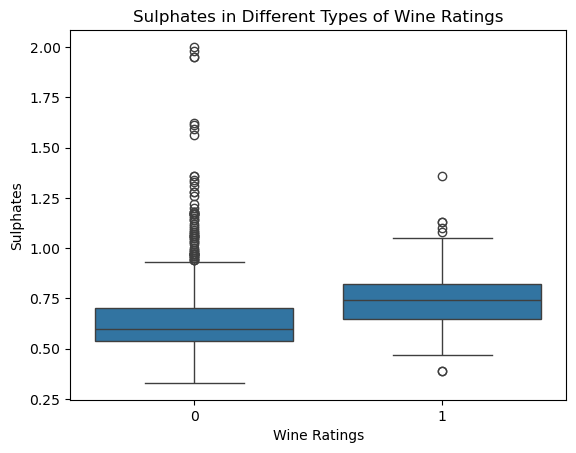

In [39]:
bx = sns.boxplot(x="rating", y='sulphates', data=data)

# Set labels and title
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in Different Types of Wine Ratings')

# Show the plot
plt.show()

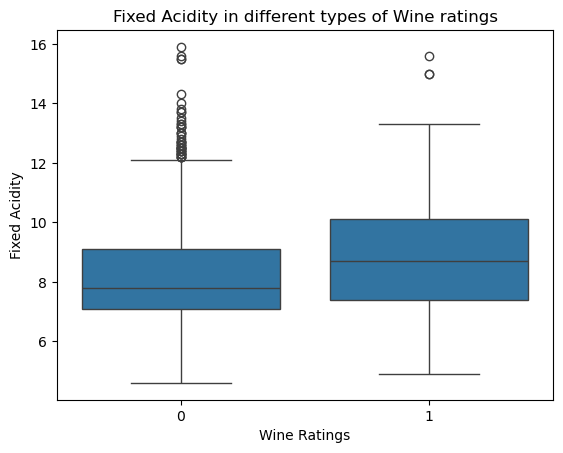

In [40]:
bx = sns.boxplot(x="rating", y='fixed acidity', data=data)

# Set labels and title
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

# Show the plot
plt.show()

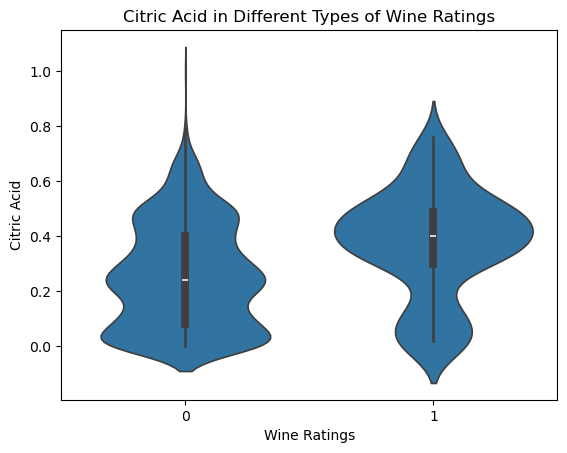

In [41]:
# Create a violin plot for citric acid by wine ratings
bx = sns.violinplot(x="rating", y='citric acid', data=data)

# Set labels and title
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric Acid in Different Types of Wine Ratings')

# Show the plot
plt.show()

C:\Users\dhaka\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dhaka\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


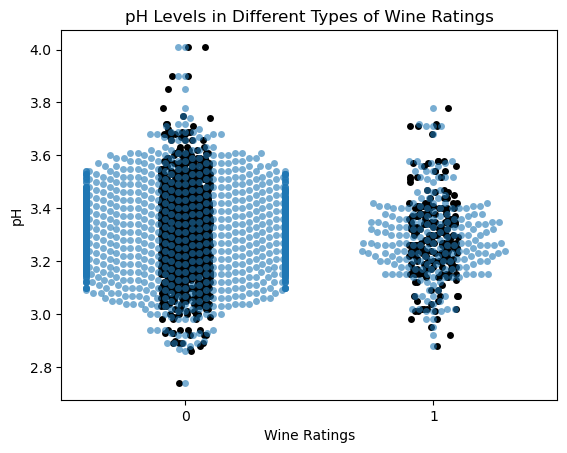

In [42]:
# Create a strip plot for pH by wine ratings
bx = sns.stripplot(x="rating", y="pH", data=data, jitter=True, color='black')

# Optionally, overlay with a swarm plot
bx = sns.swarmplot(x="rating", y="pH", data=data, alpha=0.6)

# Set labels and title
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH Levels in Different Types of Wine Ratings')

# Show the plot
plt.show()

In [43]:
# Create and fit the Extra Trees Classifier
classifiern = ExtraTreesClassifier(random_state=1)  # Set random_state for reproducibility
classifiern.fit(X, Y)

# Get feature importances
score = classifiern.feature_importances_
print(score)

[0.12421547 0.14664461 0.11313842 0.11069246 0.10956209 0.15814061
 0.23760634]


In [44]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Logistic regression

In [46]:
# Create and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", accuracy)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Optional: Classification report for precision, recall, and F1 score
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy Score: 0.8791666666666667
Confusion Matrix:
 [[405  12]
 [ 46  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       417
           1       0.59      0.27      0.37        63

    accuracy                           0.88       480
   macro avg       0.74      0.62      0.65       480
weighted avg       0.86      0.88      0.86       480



In [138]:
# Create and fit the Decision Tree
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate accuracy
print("Accuracy Score:", accuracy_score(Y_test,y_pred))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Optional: Classification report for precision, recall, and F1 score
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy Score: 0.875
Confusion Matrix:
 [[383  34]
 [ 26  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       417
           1       0.52      0.59      0.55        63

    accuracy                           0.88       480
   macro avg       0.73      0.75      0.74       480
weighted avg       0.88      0.88      0.88       480

